### ALY6983 ST: Python for Data Science
### Instructor: Joel Schwartz
### Minyi Chen
### July 1, 2018



### Overview

In this final project, I generate wordcloud graph for .txt file. I use the tip text of resturant Meat & Potatoes in Pittsburgh, PA as an example to show you how it works. The data is from Yelp Dataset. I wrote two main functions: clean(text) and create_wordcloud(text) to clean and generate wordcloud of a text file.

A tsunami of data is generated by the Internet and social media. Being able to use Natural Language Processing (NLP) to uncover the insights of this unstructured data is valuable and interests me. Thus, I pick wordcloud generating as my final project and also the start of learning NLP.



### Part 1. Prepare the data

Go to https://www.yelp.com/dataset/challenge, download the json dataset. After downloading, you will have 2.7G .tar format in your computer (.tar means double compressed). You can get free 7 zip here: https://www.7-zip.org/. Use 7 zip to unzip the .tar file, then you get a 6.07GB file. Change the extension of this file to .tar, and then unzip it again. Finally, you get several json files in the folder. The explanation of each json file is here: https://www.yelp.com/dataset/documentation/json. The size of each json is 1) business.json 138mb, 2) checkin.json 60.3mb, 3) photos.json 25.6mb, 4) review.json 3.9GB, 5) tip.json 188mb, 6) user.json 1.76GB. These datasets are prepared for the Yelp_Dataset_Challenge_Round_11 from January 18, 2018 to June 30, 2018.

In order to get the review texts for resturant Meat&Potatoes in Pittsburgh, PA, I need business.json and tip.json files. Review dataset is too big for me to run, so I pick tip dataset that includes short review texts of resturants.

IMPORTANT NOTE: 
I provide the codes for this part below to show you how I get the txt file. You don't need to run the codes, because I provide you the meatpotato.txt file, and the original json file is too big to be uploaded. You can download txt directly so you don't need to create it yourself. You run the codes of Part 2 & 3, make sure you install the packages, know your directory, and put the meatpotato.txt and cow.jpg in your directory. I will remind you in the codes.


### Part 2. Clean the text functions

In order to do further analysis on text file using deep learning or machine learning model, you need to clean the text file first which means split the text into words with some cleaning. Here, I do some basic cleaning of the text: strip white spaces, turn all words into lowercase, tokenize text, remove puntuation, remove stopwords, and stem words.

1) strip whitespaces.
This will remove the white spaces in the text.

2) lowercase text.
This will turn letters into lowercase. For example, turn Hi into hi, I into i. The reason I need to do this is because the stopwords are all in lowercase such as i. I want to remove stopwords, so I need to turn my words in the text into lowercase.

3) tokenize text.
This will break your text up into individual words. This step is important because it turns the text into data for us to analyze later.

4) remove puntuation.
This will only keep letters, so it will remove the puntuation such as "." "," "!", numbers, etc.

5) remove stopwords.
This will remove the extremely common words (called "stopwords") such as me, my, did, a, the. These words don't give us much information, so we want to remove them. We need to do this for tokenized words. 

6) Stem words.
This will make some words into the same word, their root forms. For example, turn waiting/waited/waits into wait. However, it doesn't do a good job in my case as you will see soon. For example, it will turn fries into fri, which doesn't make sense. Thus, I keep this out of my function clean(), and define a seperate function for it. We also need to do this for tokenized words.


Python has several built-in functions associated with the string data type. We can use this functions to do some basic cleaning: strip whitespaces (string.strip()), lowercase text (string.lower()), remove puntuation/keep all letters (string.isalpha()). Then we use nltk (natural language toolkit) packages to tokenize text, remove stopwords, and stem words.


References:
https://machinelearningmastery.com/clean-text-machine-learning-python/




### Part 3. Create word cloud function

Then use wordcloud packages to create wordcloud graph for the cleaned text and the original text. I find that the wordcloud package do a good job for the original text. One special thing I do for the word cloud is that I change the mask of the default wordcloud. In my case, I pick a cow picture to make the wordcloud looks like a cow. I pick cow picture because there is a cow on the resturant Meat&Potatoes website http://www.meatandpotatoespgh.com/. 

More info about wordcloud: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html


### Next, we need to get all the packages we need first, if you don't install them, you need to use pip install to install them first in anaconda prompt.


### GET START

In [1]:
# In Anaconda prompt, install these first
# pip install nltk
# pip install wordcloud

# Then,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import nltk
from nltk import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [20]:
# To check your current working directory (cwd)
os.getcwd()

'C:\\Users\\minyi'

### Part 1. Prepare the data   

### (You don't need to run this part)  #################################

### (This part is to show you how I get the meatpotato.txt file which you download it from github)



In [19]:
# Put business.json & tip.json file in the directory
# Read the tip.json file as dataframe and show the first 3 rows
# The columns incldue business_id, date, likes, text, and user_id
# We only need business_id and text columns
# lines=true means that read the file line by line
df1= pd.read_json('tip.json', lines=True)
df1.head(3)

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw


In [21]:
# Read the business.json file as dataframe and show the first 3 rows
# We can see the file includes columns: business_id, categories, city, name, stars, state, etc.
df2= pd.read_json('business.json', lines=True)
df2.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ


In [22]:
# See the top 15 most reviewed businesses which are all in Las Vegas
# In the code, we first select the columns in the data set,
# and then sort the review_count number from large to small
df2[['name','categories','city','state','review_count','stars']].sort_values(ascending = False,by='review_count')[0:15]

,name,categories,city,state,review_count,stars
97944,Mon Ami Gabi,"[French, Steakhouses, Restaurants, Breakfast &...",Las Vegas,NV,7361,4.0
119907,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",Las Vegas,NV,7009,4.0
69993,Wicked Spoon,"[Buffets, Breakfast & Brunch, Restaurants]",Las Vegas,NV,5950,3.5
81212,Gordon Ramsay BurGR,"[American (Traditional), Burgers, Restaurants]",Las Vegas,NV,5447,4.0
139699,Earl of Sandwich,"[Caterers, Sandwiches, Restaurants, Food Deliv...",Las Vegas,NV,4869,4.5
19191,Hash House A Go Go,"[American (New), Restaurants, Breakfast & Brunch]",Las Vegas,NV,4774,4.0
80590,The Buffet,"[Buffets, Restaurants]",Las Vegas,NV,4018,3.5
124412,Lotus of Siam,"[Car Dealers, Thai, Automotive, Seafood, Bars,...",Las Vegas,NV,3964,4.0
21006,Serendipity 3,"[Social Clubs, Arts & Entertainment, American ...",Las Vegas,NV,3910,3.0
93038,The Buffet at Bellagio,"[Buffets, Restaurants, American (New)]",Las Vegas,NV,3838,3.5


In [7]:
# See the top 4 most reviewed businesses in Pittsburgh with 4.5 star
df2[(df2['city'] == 'Pittsburgh') & (df2['stars'] == 4.5)].sort_values("review_count", ascending=False)[0:4]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
36476,1601 Penn Ave,"{'RestaurantsTableService': False, 'GoodForMea...",u4sTiCzVeIHZY8OlaL346Q,"[Argentine, Seafood, Restaurants, Latin American]",Pittsburgh,"{'Tuesday': '11:00-21:00', 'Friday': '11:00-22...",1,40.449043,-79.987573,Gaucho Parrilla Argentina,Strip District,15222,1267,4.5,PA
15487,242 S Highland Ave,"{'RestaurantsTableService': True, 'GoodForMeal...",dLc1d1zwd1Teu2QED5TmlA,"[Restaurants, Noodles, Thai]",Pittsburgh,"{'Monday': '12:00-22:00', 'Tuesday': '12:00-22...",1,40.457748,-79.925494,Noodlehead,Shadyside,15206,820,4.5,PA
174433,214 6th St,"{'RestaurantsTableService': True, 'GoodForMeal...",woXlprCuowrLJswWere3TQ,"[Mexican, American (New), Restaurants]",Pittsburgh,"{'Monday': '17:00-23:00', 'Tuesday': '17:00-23...",1,40.442229,-80.001985,täkō,Downtown,15222,806,4.5,PA
7282,212 6th St,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...",SmkYLXEYhzwUZdS6TAevHg,"[Nightlife, Bars, Restaurants, Cocktail Bars, ...",Pittsburgh,"{'Tuesday': '17:00-23:00', 'Friday': '17:00-0:...",1,40.442334,-80.002066,Butcher and the Rye,Downtown,15222,677,4.5,PA


In [8]:
# see the top 4 most reviewed businesses in Pittsburgh with 4 star
df2[(df2['city'] == 'Pittsburgh') & (df2['stars'] == 4)].sort_values("review_count", ascending=False)[0:4]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
130495,649 Penn Ave,"{'RestaurantsTableService': True, 'GoodForMeal...",JLbgvGM4FXh9zNP4O5ZWjQ,"[Specialty Food, Steakhouses, Meat Shops, Amer...",Pittsburgh,"{'Monday': '17:00-23:00', 'Tuesday': '17:00-23...",1,40.443145,-80.001104,Meat & Potatoes,Downtown,15222,1476,4.0,PA
3182,1805 E Carson St,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",LQFmktF43j2NPncKdNd9mg,"[Restaurants, Bars, Nightlife, American (Tradi...",Pittsburgh,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,40.428967,-79.980176,Fat Heads Saloon,South Side,15203,657,4.0,PA
76284,942 Penn Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",sMzNLdhJZGzYirIWt-fMAg,"[Cocktail Bars, American (New), Nightlife, Ita...",Pittsburgh,"{'Monday': '11:00-22:00', 'Tuesday': '11:00-22...",1,40.443950,-79.996437,Sienna Mercato,Downtown,15222,632,4.0,PA
135266,1150 Smallman St,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",d2ZQRjuizstCTnicysmpMQ,"[Restaurants, American (New)]",Pittsburgh,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,40.446002,-79.993500,Eleven,Strip District,15222,572,4.0,PA


In [24]:
# Prepare txt file
# Meat & Potatoes business_id: JLbgvGM4FXh9zNP4O5ZWjQ
# Select the text that are from Meat & Potatoes to new dataframe
# Keep the text column only
# Save the new dataframe to meatpotato.txt
# then you will find a meatpotato.txt file in your directory
df1n = df1[(df1['business_id'] == 'JLbgvGM4FXh9zNP4O5ZWjQ')]
df1n1 = df1n["text"].to_csv("meatpotato.txt", header=False)

### Part 2. Clean the text

### Please download meatpotato.txt and cow.jpg, and put them in your directory

In [25]:
# Read txt file
# 'r' means open a text file and then read from the file
# read() means the contents of the file are copied into the text as string
# print() the contents of the text
mp = open('meatpotato.txt','r').read()
print(mp)

645,Didn't think I would need a reservation on a Sunday. I was wrong.
1125,A foodie must. Stop in and try the small plates and specialty cocktails on your way around the cultural district. Or take a date for dinner.
3602,Bloody Mary bar....JERK vodka! I mean that in the best sense of 'jerk' of course!
3603,Now THIS is the way to do Lenten Fridays!
3604,Ribs! Smoked for hours and hours right out back....nice.
3708,Best Brunch in Da Burgh!
4412,These guys fill up fast and it gets noisy real quick - make a reservation and go early if you can!
4663,A great drink selection and a unique menu
5818,Om nom nom
5819,Quick dinner before Van Halen
5820,Love the bone marrow and the tartare.
5948,Make a reservation! This place is busy even on a Sunday night.
6007,"Probably the most epic Bloody Mary bar of all time! Oh, and I must also mention that there is one for the bellinis!!"
6702,Heard a lot of good things - meeting brother and sis for dinner :-)
6703,Really good burger - bun is very good - mad

In [26]:
# Download the stopwords from nltk package, and load the stop words in English
# You can see the lists of the stopwords in english
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# define function clean() to do the basic text cleaning
# strip white space, lowercase, tokenize, remove puntuation/only keep letters, remove stopwords
# Python has several built-in functions associated with the string data type:
# strip whitespaces (string.strip()), lowercase text (string.lower()), 
# remove puntuation/keep all letters (string.isalpha()). 
# Then we use nltk (natural language toolkit) packages to tokenize text, remove stopwords
def clean(text):
    stripwhitespace= text.strip()
    lowercase= stripwhitespace.lower()
    tokenize = nltk.word_tokenize(lowercase)
    no_puntuation = [word for word in tokenize if word.isalpha()] # only keep letters in the tokenize
    stop = stopwords.words('english') # save the stopwords in stop
    result_text = [word for word in no_puntuation if word not in stop] # get the text that is in the no_puntuation, but not in the stop
    return result_text

In [28]:
# clean our text
# You can see the text are cleaner than the original one and they are tokenized
clean(mp)

['think',
 'would',
 'need',
 'reservation',
 'sunday',
 'wrong',
 'foodie',
 'must',
 'stop',
 'try',
 'small',
 'plates',
 'specialty',
 'cocktails',
 'way',
 'around',
 'cultural',
 'district',
 'take',
 'date',
 'dinner',
 'bloody',
 'mary',
 'bar',
 'vodka',
 'mean',
 'best',
 'sense',
 'course',
 'way',
 'lenten',
 'fridays',
 'ribs',
 'smoked',
 'hours',
 'hours',
 'right',
 'back',
 'best',
 'brunch',
 'da',
 'burgh',
 'guys',
 'fill',
 'fast',
 'gets',
 'noisy',
 'real',
 'quick',
 'make',
 'reservation',
 'go',
 'early',
 'great',
 'drink',
 'selection',
 'unique',
 'menu',
 'om',
 'nom',
 'nom',
 'quick',
 'dinner',
 'van',
 'halen',
 'love',
 'bone',
 'marrow',
 'tartare',
 'make',
 'reservation',
 'place',
 'busy',
 'even',
 'sunday',
 'night',
 'probably',
 'epic',
 'bloody',
 'mary',
 'bar',
 'time',
 'oh',
 'must',
 'also',
 'mention',
 'one',
 'bellinis',
 'heard',
 'lot',
 'good',
 'things',
 'meeting',
 'brother',
 'sis',
 'dinner',
 'really',
 'good',
 'burger',
 'b

In [29]:
# stem words use nltk packages
def stem(textname):
    ps = PorterStemmer() # define the function as ps
    for word in textname:
        stem = ps.stem(word)
        result = print(word + ":" + stem) # shows the original words and the stem words
    return result

In [31]:
# stem words of our text
# You can see some do a good job: fridays -> friday
# some do a poor job: fries -> fri, which change the meaning of the word
# That's why I didn't put stem into the function clean()
mp_clean = clean(mp)
stem(mp_clean)

think:think
would:would
need:need
reservation:reserv
sunday:sunday
wrong:wrong
foodie:foodi
must:must
stop:stop
try:tri
small:small
plates:plate
specialty:specialti
cocktails:cocktail
way:way
around:around
cultural:cultur
district:district
take:take
date:date
dinner:dinner
bloody:bloodi
mary:mari
bar:bar
vodka:vodka
mean:mean
best:best
sense:sens
course:cours
way:way
lenten:lenten
fridays:friday
ribs:rib
smoked:smoke
hours:hour
hours:hour
right:right
back:back
best:best
brunch:brunch
da:da
burgh:burgh
guys:guy
fill:fill
fast:fast
gets:get
noisy:noisi
real:real
quick:quick
make:make
reservation:reserv
go:go
early:earli
great:great
drink:drink
selection:select
unique:uniqu
menu:menu
om:om
nom:nom
nom:nom
quick:quick
dinner:dinner
van:van
halen:halen
love:love
bone:bone
marrow:marrow
tartare:tartar
make:make
reservation:reserv
place:place
busy:busi
even:even
sunday:sunday
night:night
probably:probabl
epic:epic
bloody:bloodi
mary:mari
bar:bar
time:time
oh:oh
must:must
also:also
mention:men

### Part 3. Create word cloud

In [32]:
# check the type of mp_clean
type(mp_clean)

list

In [34]:
# convert List into String, we use join()
# we need string type of text to create word cloud
new = " ".join(mp_clean)
print(new)

think would need reservation sunday wrong foodie must stop try small plates specialty cocktails way around cultural district take date dinner bloody mary bar vodka mean best sense course way lenten fridays ribs smoked hours hours right back best brunch da burgh guys fill fast gets noisy real quick make reservation go early great drink selection unique menu om nom nom quick dinner van halen love bone marrow tartare make reservation place busy even sunday night probably epic bloody mary bar time oh must also mention one bellinis heard lot good things meeting brother sis dinner really good burger bun good made house fries excellent av wild turkey stout yummy convenient street garage parking around corner lunch hours start pub burger france short rib hash irish breakfast tater n truffle mayo brunch work lunch got black blue burger epic sunday brunch love place sadly brunch least favorite visit subpar service gnats bloody mary bar food still good though food chart tonight try old school coc

In [41]:
# generate wordcloud (wc) for the text file
# more info about wordcloud:
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

def create_wordcloud(text):
    # I want the wordcloud to be a certain shape, here is the cow shape
    # read the background image:
    pic = imageio.imread('cow.jpg') 
    wc_text = WordCloud(mask=pic, # give a binary mask on where to draw word
                        background_color="white", # background color is white
                        scale=10,  # to make the words clearer and make the graph bigger in the .jpg file
                        stopwords=STOPWORDS # remove the build-in stopwords such as these, here, how, can, me, etc.
                                            # If None, the build-in STOPWORDS list will be used.
                        ).generate(text) # generate the word cloud
    pic_colors = ImageColorGenerator(pic) # create coloring from image
    plt.axis('off')  # remove the axes in the wc_text because the original word cloud comes with the axes
    plt.imshow(wc_text) # show the word cloud graph wc_text
    wc_text.to_file('text.jpg') #save wordcloud graph wc_text to jpg file in your directory
    

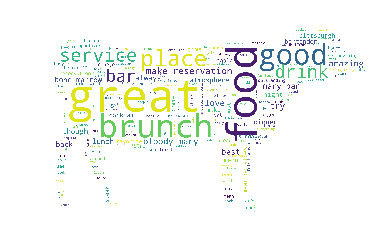

In [43]:
# creat word cloud for the text
# Please check your directory, and find a wc.jpg that is larger and clearer
create_wordcloud(new)